<a href="https://colab.research.google.com/github/AlphaDiSC/1/blob/main/FM_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

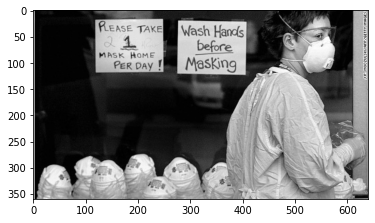

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

DATADIR="/content/drive/My Drive/Colab Notebooks/Dataset/"
CATEGORIES=["mask","no_mask"]

for category in CATEGORIES:
  path=os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break


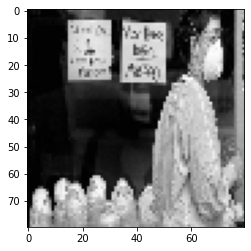

In [ ]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass      

create_training_data()

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
print(len(training_data))

4094


In [ ]:
X=[]
y=[]
for features, label in training_data:
  X=np.append(X, features)
  y=np.append(y, label)

X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = y.reshape(-1,1)

In [ ]:
print(X.shape,y.shape)

(4094, 80, 80, 1) (4094, 1)


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

X=X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=50, validation_split=0.1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
116/116 [==============================] - 54s 459ms/step - loss: 0.5507 - accuracy: 0.7158 - val_loss: 0.4361 - val_accuracy: 0.8024
Epoch 2/50
116/116 [==============================] - 52s 450ms/step - loss: 0.3603 - accuracy: 0.8396 - val_loss: 0.3479 - val_accuracy: 0.8537
Epoch 3/50
116/116 [==============================] - 52s 450ms/step - loss: 0.2844 - accuracy: 0.8849 - val_loss: 0.3517 - val_accuracy: 0.8537
Epoch 4/50
116/116 [==============================] - 53s 461ms/step - loss: 0.2066 - accuracy: 0.9186 - val_loss: 0.3343 - val_accuracy: 0.8829
Epoch 5/50
116/116 [==============================] - 53s 461ms/step - loss: 0.1605 - accuracy: 0.9362 - val_loss: 0.3763 - val_accuracy: 0.8927
Epoch 6/50
116/116 [==============================] - 53s 459ms/step - loss: 0.1292 - accuracy: 0.9471 - val_loss: 0.3982 - val_accuracy: 0.8927
Epoch 7/50
116/116 [==============================] - 52s 447ms/step - loss: 0.0911 - accuracy: 0.9644 - val_loss: 0.3966 - val_ac

In [ ]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


In [ ]:
# Testing the model

def prepare(filepath):
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict([prepare("/content/drive/MyDrive/Colab Notebooks/TestData/pmask.JPG")])
print(prediction)


[[0.]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Colab Notebooks/TestData/pmask.JPG")])
print( CATEGORIES[int(prediction[0][0])])

mask


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
